<p style="text-align: center;"><img src="http://www.ucm.es/logo/ucm.png" alt="ucm" style="height: 100px;"/>   <img src="https://www.ucm.es/data/cont/media/www/pag-18458/logo_aocg.jpg" alt="aocg" style="height: 100px;"/> 

&nbsp;

<div align="center"> 
<font size=5> Universidad Complutense de Madrid</font>
</div>
    
<div align="center"> 
<font size=4> Grupo Computense de Óptica Aplicada </font>
</div>
&nbsp;

&nbsp;



    
<div align="center"> 
<font size=6> Phyton_kriging: kriging standard radial 2D </font>
</div>

- **Fecha**: 2023/03/28
        
- **Objetivos**: 2D standard Kriging 
- **Descripción** Tutorial for determining how it works

- **Autores**: 
    - Luis Miguel Sánchez Brea

In [18]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
import numpy as np

np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

In [43]:
from matplotlib import rcParams

rcParams['figure.dpi'] = 100
rcParams['lines.markersize']=10
rcParams['image.cmap']='hot'
rcParams['figure.figsize']=(8,8)

%matplotlib inline


# Theoretical variogram 



In [44]:
import ipywidgets as widgets

In [45]:
from phyton_kriging import np, plt

from phyton_kriging.variogram_1D import theoretical
#from phyton_kriging.variogram_2D import theoretical
from phyton_kriging.standard_2D import kriging2D

## Variograma 1D

In [46]:
h = np.linspace(0, 10, 1000)

name = gauss

h: min - 0.0, max - 10.0
variogram: min - 0.0625, max - 1.0605695458637723
parameters = {'sc': 0.25, 'A': 1, 'lc': 4, 'power': 2}



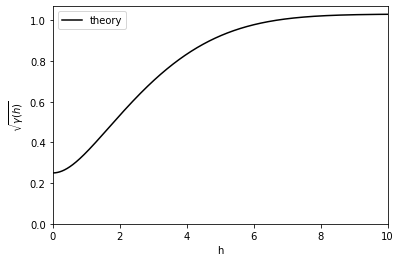

In [47]:
sc = .25
I0 = .00001

# var_theo = theoretical(h=h, make_2D=False)
var_theo = theoretical(h=h)
var_theo.gauss(sc=sc, A=1, lc=4, power=2)
var_theo.draw()
print(var_theo)

In [48]:
def f_signal(x, y, sc=0, I0=0, type=0):
    """Simulation of data

    Args:
        x (np.array): x_positions
        y (np.array): y_positions
        sc (float or np.array): random noise
        I0 (float or np.array): detector precision

    Returns:
        y (np.array): data.
    """
    num_sensors = len(x)

    if type == 0:
        z = x+y
    elif type ==1:
        z = np.sin(2 * np.pi * x / 10) * np.sin(2 * np.pi * y / 10)+x/20
    else:
        z = np.exp(-(x**2+y**2)/(2*5**2))
    z = z + sc * np.random.randn(num_sensors)
    z = z + 2 * I0 * (np.random.rand(num_sensors) - 0.5)

    return z

In [49]:
num_x = num_y = 15
num_sensors = num_x * num_y

sensors = np.zeros((num_sensors, 4), dtype=float)

x = -10 + 20 * np.random.rand(num_sensors)
y = -10 + 20 * np.random.rand(num_sensors)

x = np.linspace(-10, 10, num_x)
y = np.linspace(-10, 10, num_y)

X,Y=np.meshgrid(x,y)
x = X.flatten()
y= Y.flatten()


sensors[:, 0] = x
sensors[:, 1] = y
sensors[:, 2] = f_signal(x,y,sc,I0)
sensors[:, 3] = sc * np.ones_like(x)

sensors[:, 2] = sensors[:, 2] + sensors[:, 3] * np.random.randn(num_sensors)


In [50]:
num_sampling = 60**2
num_x = num_y = int(np.sqrt(num_sampling))
x_sampling = np.linspace(-10, 10, num_x)
y_sampling = np.linspace(-10, 10, num_y)


X_sampling, Y_sampling = np.meshgrid(x_sampling,y_sampling)
sampling2D = (x_sampling, y_sampling)
z_ideal_sampling = f_signal(X_sampling, Y_sampling, 0, 0)
Sampling2D = (X_sampling, Y_sampling)

In [51]:
krig1 = kriging2D(sensors=sensors, variogram=var_theo, sampling=sampling2D)
krig1.ideal = z_ideal_sampling

In [52]:
krig1.standard_radial()

In [53]:
# krig1.standard_non_uniform()

In [54]:
print(krig1.estimation.shape)
print(krig1.error.shape)
print(krig1.lambdas.shape)
print(z_ideal_sampling.shape)

(60, 60)
(60, 60)
(60, 60, 225)
(60, 60)


## Drawings

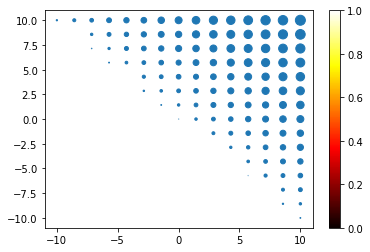

In [55]:
krig1.draw('data')

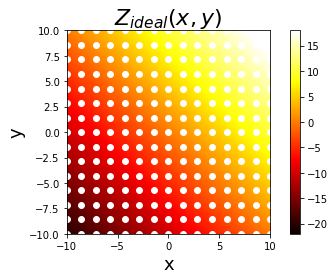

In [56]:
krig1.draw('ideal')

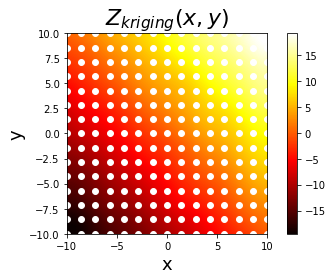

In [57]:
krig1.draw('kriging')

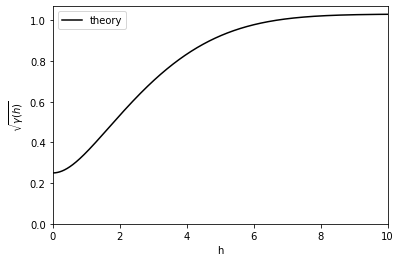

In [58]:
krig1.draw('variogram')

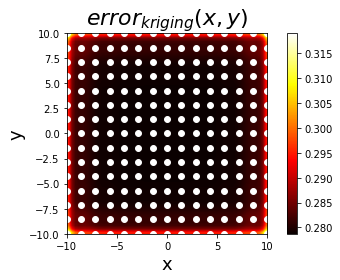

In [59]:
krig1.draw('error')


In [60]:
print(krig1.error.min(), krig1.error.max())
print(krig1.error.mean(), krig1.error.std())


0.2787242312757193 0.31904708579383356
0.28144890144805074 0.00450359436723848


interactive(children=(IntSlider(value=112, description='i', max=224), Output()), _dom_classes=('widget-interac…

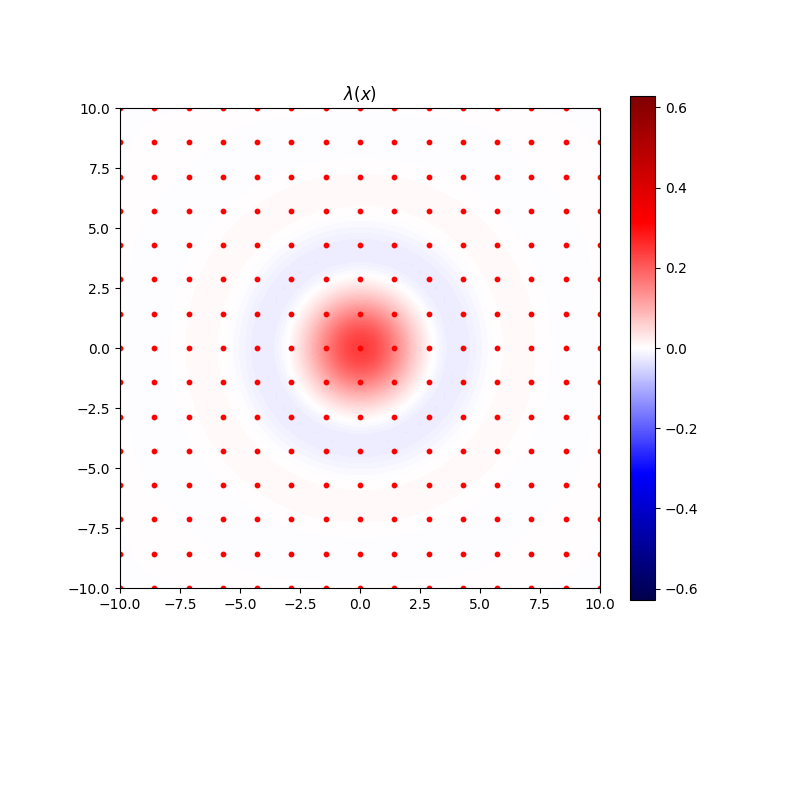

In [63]:
%matplotlib widget
krig1.draw('lambdas')

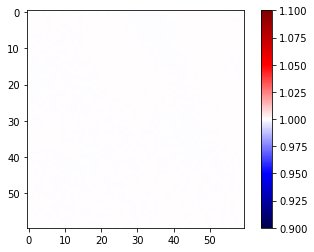

In [62]:
%matplotlib inline
plt.figure()
plt.imshow(krig1.lambdas.sum(axis=2), cmap='seismic')
plt.colorbar()
plt.clim(0.9, 1.1)